In [2]:
from datetime import datetime # Current date time in local system print()
curent_timestamp = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

In [3]:
from pathlib import Path
DATA_PATH = Path('../data/gtzan')
RESULTS_PATH = Path('../results/gtzan')
FINAL_RESULTS_PATH = Path('../results/gtzan/final')
import pandas as pd
import glob
import os

In [4]:
# setting the path for joining multiple files
files = os.path.join(FINAL_RESULTS_PATH, "cv_results_tabular_data_*.csv")
# list of merged files returned
files = glob.glob(files)

files

['..\\results\\gtzan\\final\\cv_results_tabular_data_2022_12_19_15_08_14.csv',
 '..\\results\\gtzan\\final\\cv_results_tabular_data_2022_12_19_16_09_23.csv',
 '..\\results\\gtzan\\final\\cv_results_tabular_data_2022_12_19_16_23_00.csv',
 '..\\results\\gtzan\\final\\cv_results_tabular_data_2022_12_19_16_36_25.csv',
 '..\\results\\gtzan\\final\\cv_results_tabular_data_2022_12_19_16_57_38.csv',
 '..\\results\\gtzan\\final\\cv_results_tabular_data_2022_12_19_17_41_27.csv',
 '..\\results\\gtzan\\final\\cv_results_tabular_data_2022_12_19_17_44_52.csv',
 '..\\results\\gtzan\\final\\cv_results_tabular_data_2022_12_21_02_33_29.csv']

In [25]:

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df = df.sort_values(by='mean_test_score', ascending=False)
df = df.reset_index(drop=True)
df.clf = df.clf.replace('MLP_', 'MLP')
df

,mean_test_score,mean_fit_time,std_test_score,clf,clf__alpha,clf__batch_size,clf__early_stopping,clf__layers_string,clf__learning_rate_init,clf__max_iter,...,clf__degree,clf__gamma,clf__n_neighbors,clf__penalty,clf__boosting_type,clf__learning_rate,clf__max_bin,clf__min_child_samples,clf__n_estimators,clf__num_leaves
0,0.76875,1.316509,0.028229,LGBM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,goss,0.074030,31.0,30.0,600.0,100.0
1,0.76500,1.523729,0.020000,LGBM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,goss,0.063847,231.0,26.0,314.0,46.0
2,0.76375,1.423505,0.023184,LGBM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,goss,0.104880,255.0,30.0,379.0,100.0
3,0.76250,1.475242,0.030873,LGBM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,goss,0.059124,31.0,30.0,600.0,55.0
4,0.75750,1.488137,0.022500,LGBM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,goss,0.114429,73.0,16.0,418.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0.10500,0.053396,0.002500,SVC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
660,0.10500,0.058599,0.002500,SVC,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,0.000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
661,0.10500,0.048800,0.002500,SVC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.000016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,0.10500,0.049049,0.002500,SVC,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.004004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
curent_timestamp = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
# df.to_csv(FINAL_RESULTS_PATH/f'cv_final_results_{curent_timestamp}.csv', index=False)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" ) # UserWarning: X% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
plt.style.use('seaborn-paper')

In [1]:
fig, ax = plt.subplots(figsize=(15,6), dpi=100)
sns.swarmplot(x="clf", y="mean_test_score", data=df, palette='viridis', ax=ax, s=5.3)
#sns.stripplot(x="clf", y="mean_test_score", data=df, palette='viridis', ax=ax, s=4.5)

plt.xlabel('model', fontsize=16)
plt.ylabel('średnia dokładność', fontsize=16)
plt.suptitle('Wyniki walidacji krzyżowej', fontsize=20)
plt.title('porównanie dokładności modeli na zbiorze treningowym', fontsize=16)
# ax.tick_params(axis='both', which='major', labelsize=13)
# ax.tick_params(axis='both', which='minor', labelsize=13)
curent_timestamp = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
plt.savefig(FINAL_RESULTS_PATH/f'models_acc.png')

NameError: name 'plt' is not defined

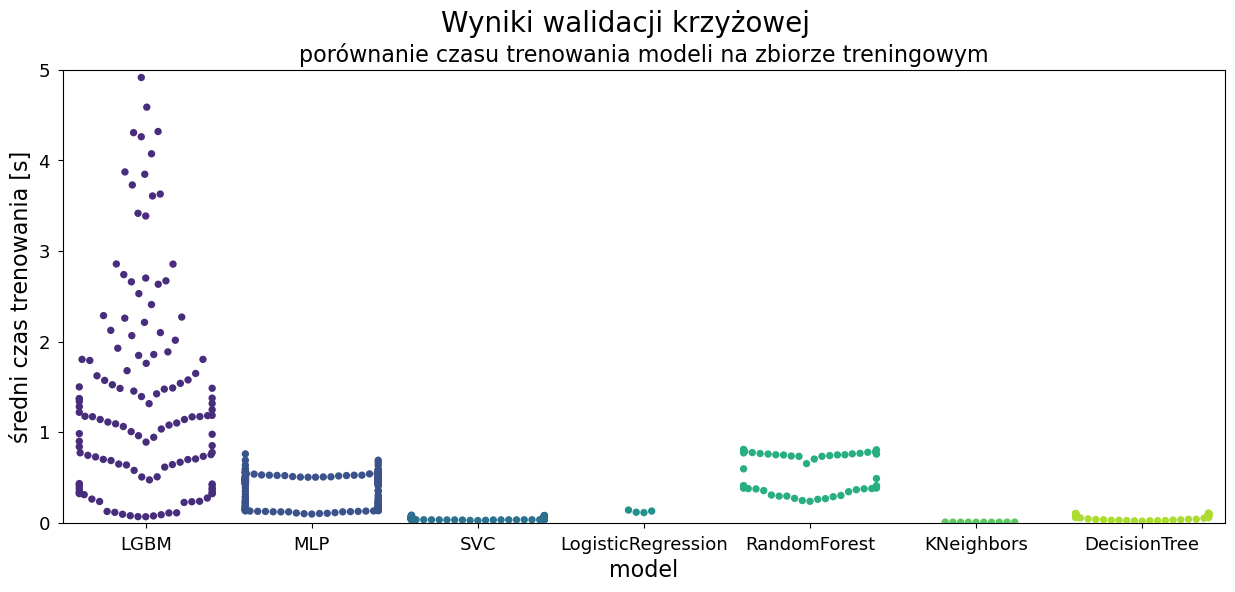

In [79]:
fig, ax = plt.subplots(figsize=(15,6), dpi=100)
sns.swarmplot(x="clf", y="mean_fit_time", data=df, palette='viridis', ax=ax, s=5.3)

plt.xlabel('model', fontsize=16)
plt.ylabel('średni czas trenowania [s]', fontsize=16)
plt.suptitle('Wyniki walidacji krzyżowej', fontsize=20)
plt.title('porównanie czasu trenowania modeli na zbiorze treningowym', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.ylim([0, 5])

curent_timestamp = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
plt.savefig(FINAL_RESULTS_PATH/f'fit_time.png')

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv(DATA_PATH/'features_30_sec.csv').drop(['filename', 'length'], axis=1)
y = df.pop('label')
X = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import winsound

In [114]:
# from sklearn.base import clone

best_model = LGBMClassifier(objective='multiclass',  num_class=10, class_weight = 'balanced',
                            learning_rate = 0.0740302767140152,
                            max_depth = 20,
                            min_child_samples = 30,
                            boosting_type = 'goss',
                            num_leaves = 100,
                            n_estimators = 600,
                            max_bin = 31)



# best_model = RandomForestClassifier(criterion="entropy", max_depth=15, min_samples_leaf=1) #<----lepsze
                            
# best_model = DecisionTreeClassifier(criterion="entropy", max_depth=9, min_samples_leaf=1) # <----lepsze

# MODELE KTÓRE NIE RADZĄ SOBIE NA DUŻYCH ZBIORACH DANYCH

# best_model = MLPClassifier(random_state=7,                               
#                             alpha=0.0007117061717928526,
#                             batch_size=32,
#                             early_stopping=True,
#                             hidden_layer_sizes=(96,64),
#                             learning_rate_init=0.004640708592018506,
#                             max_iter=300,)

# best_model = SVC(C=2760.605001057674,degree=1,gamma=0.025174641216419515,kernel="rbf")     

# best_model = KNeighborsClassifier(n_neighbors=4)    

# best_model = LogisticRegression(max_iter=300)  


best_model.fit(X_train.values, y_train)
y_pred = best_model.predict(X_test.values)

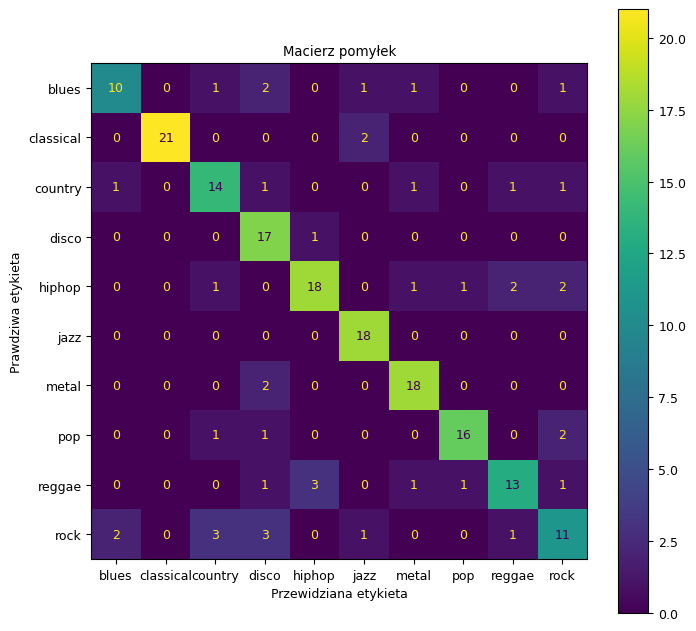

In [121]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
fig, ax = plt.subplots(figsize=(8,8), dpi=100)

disp.plot(ax=ax, colorbar=True)
plt.rcParams['font.size'] = '8'
plt.xlabel('Przewidziana etykieta')
plt.ylabel('Prawdziwa etykieta')
# plt.suptitle('Macież pomyłek')
plt.title('Macierz pomyłek')

curent_timestamp = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
# plt.savefig(FINAL_RESULTS_PATH/f'confusion_matrix_ml_3s_{curent_timestamp}.png')




In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       blues       0.13      0.02      0.03       204
   classical       0.48      0.52      0.50       186
     country       0.27      0.18      0.22       214
       disco       0.15      0.09      0.11       205
      hiphop       0.22      0.13      0.17       201
        jazz       0.34      0.33      0.33       207
       metal       0.35      0.40      0.38       198
         pop       0.23      0.53      0.32       195
      reggae       0.23      0.55      0.32       200
        rock       0.29      0.04      0.07       188

    accuracy                           0.28      1998
   macro avg       0.27      0.28      0.25      1998
weighted avg       0.27      0.28      0.24      1998



In [109]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv(FINAL_RESULTS_PATH/f'3s_classification_report_results_{curent_timestamp}.csv', index= True)